# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
 # Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query = f"{url}appid={api_key}&units={units}&q="
#create lists for append
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#call counter
record = 0 

#print statement/s
print ("Beginning Data Retrieval")
print ("-------------------------------")

for city in cities:
    
    try:
        response = requests.get(f"{query}{city}").json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        #increase record counter
        record = record + 1 
        #time for api call
        time.sleep(1.00)
    #if no record, skip city call
    except:
        print("City not found. Skipped")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 0 | Hervey Bay
City not found. Skipped
Processing Record 1 | New Norfolk
Processing Record 2 | Longyearbyen
City not found. Skipped
Processing Record 3 | Rikitea
Processing Record 4 | Kununurra
Processing Record 5 | Neuquen
City not found. Skipped
Processing Record 6 | Naze
Processing Record 7 | Esperance
Processing Record 8 | Zhezkazgan
Processing Record 9 | Stuttgart
Processing Record 10 | Puerto Ayora
Processing Record 11 | Vawkavysk
Processing Record 12 | Port-Cartier
Processing Record 13 | Caconda
Processing Record 14 | Namibe
Processing Record 15 | Mount Gambier
Processing Record 16 | Ornskoldsvik
Processing Record 17 | Kruisfontein
Processing Record 18 | Marau
Processing Record 19 | Ust-Kut
Processing Record 20 | Atuona
Processing Record 21 | Saint-Philippe
Processing Record 22 | Busselton
Processing Record 23 | Pryazha
Processing Record 24 | Marquette
Processing Record 25 | Hilton Head Island
Processing 

Processing Record 230 | La Orilla
Processing Record 231 | Maragogi
Processing Record 232 | Verkhnyaya Inta
Processing Record 233 | Cabo San Lucas
Processing Record 234 | Manicore
Processing Record 235 | Udachnyy
Processing Record 236 | Arraial do Cabo
Processing Record 237 | Alice Springs
Processing Record 238 | Lorengau
Processing Record 239 | Tabou
Processing Record 240 | Smolenka
Processing Record 241 | Weligama
Processing Record 242 | Kirakira
Processing Record 243 | Geraldton
Processing Record 244 | Les Cayes
City not found. Skipped
Processing Record 245 | Chicama
Processing Record 246 | Netivot
Processing Record 247 | Svolvaer
Processing Record 248 | Pombas
Processing Record 249 | Olbia
Processing Record 250 | Cherskiy
Processing Record 251 | Mahabaleshwar
Processing Record 252 | Gat
Processing Record 253 | General Pico
Processing Record 254 | Labuhan
Processing Record 255 | Thinadhoo
Processing Record 256 | Igra
City not found. Skipped
Processing Record 257 | Goderich
Processing

Processing Record 458 | Hundested
Processing Record 459 | Baykit
Processing Record 460 | Iisalmi
Processing Record 461 | Komsomolskiy
Processing Record 462 | Bonavista
Processing Record 463 | Hailun
City not found. Skipped
Processing Record 464 | Hanzhong
Processing Record 465 | Temiscaming
Processing Record 466 | Palapye
Processing Record 467 | Aden
Processing Record 468 | Kjollefjord
Processing Record 469 | Turukhansk
Processing Record 470 | Baghdad
Processing Record 471 | Impfondo
Processing Record 472 | Port Hardy
Processing Record 473 | Half Moon Bay
Processing Record 474 | Yate
City not found. Skipped
Processing Record 475 | Haines Junction
Processing Record 476 | Saldanha
Processing Record 477 | Terrasini
Processing Record 478 | Dharchula
Processing Record 479 | Charters Towers
Processing Record 480 | Pedasi
Processing Record 481 | Inirida
Processing Record 482 | Mao
Processing Record 483 | Salinopolis
City not found. Skipped
Processing Record 484 | Moindou
Processing Record 485

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
#dictionary for list
weatherdict = {"City": city_name,
              "Cloudiness": cloudiness,
              "Country": country,
              "Date": date,
              "Humidity": humidity,
              "Lat": lat,
              "Lng": lng,
              "Max Temp": max_temp,
              "Wind Speed": wind_speed
              }

#create dataframe
weatherdata = pd.DataFrame(weatherdict)
#Raw data count
weatherdata.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Max Temp      556
Wind Speed    556
dtype: int64

In [22]:
#Saving Data to csv 
weatherdata.to_csv('../Output/weatherdata.csv')
#Display Dataframe
weatherdata.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hervey Bay,0,AU,1562833340,53,-25.30,152.85,71.60,6.93
1,New Norfolk,40,AU,1562833359,66,-42.78,147.06,48.20,11.41
2,Longyearbyen,75,NO,1562833360,81,78.22,15.63,46.40,2.24
3,Rikitea,15,PF,1562833361,84,-23.12,-134.97,73.22,17.13
4,Kununurra,11,AU,1562833362,17,-15.77,128.74,86.00,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

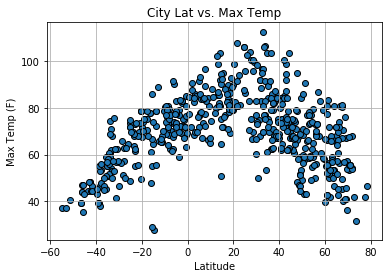

In [37]:
#scatter 1 
plt.scatter(weatherdata["Lat"], weatherdata["Max Temp"], marker="o",
           edgecolors="black")

plt.title("City Lat vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)

plt.savefig("../Images/Maxtemp_vs_Lat.png")
            
plt.show()

#### Latitude vs. Humidity Plot

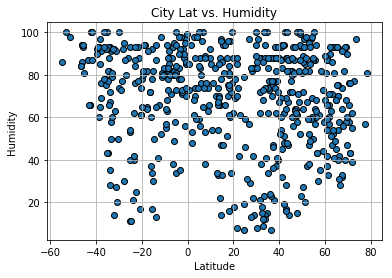

In [38]:
#scatter 2
plt.scatter(weatherdata["Lat"], weatherdata["Humidity"], marker="o",
           edgecolors="black")

plt.title("City Lat vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

plt.savefig("../Images/Lat_vs_Humidity.png")
            
plt.show()

#### Latitude vs. Cloudiness Plot

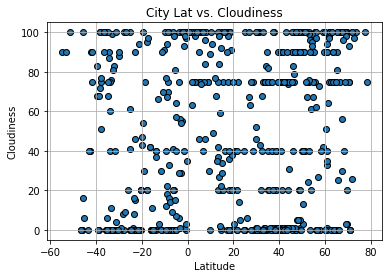

In [39]:
plt.scatter(weatherdata["Lat"], weatherdata["Cloudiness"], marker="o",
           edgecolors="black")

plt.title("City Lat vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

plt.savefig("../Images/Lat_vs_Humidity.png")
            
plt.show()

#### Latitude vs. Wind Speed Plot

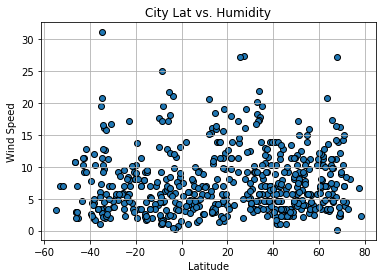

In [40]:
plt.scatter(weatherdata["Lat"], weatherdata["Wind Speed"], marker="o",
          edgecolors="black")

plt.title("City Lat vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

plt.savefig("../Images/Lat_vs_Windspeed.png")
            
plt.show()